In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('bitcoin_2010-07-27_2024-04-25.csv')

In [3]:
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.54,67070.40,63742.73,64291.07,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.02,67174.02,65884.15,66386.61,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.02,67180.03,64598.00,66818.89,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.75,65638.74,64302.47,64896.87,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.06,65351.33,63321.19,64857.99,1.537410e+11,1.263725e+12


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,5021.000000,5021.000000,5021.000000,5021.000000,5.021000e+03,5.021000e+03
mean,11169.595248,11431.896431,10894.339275,11183.603552,2.034638e+10,2.097941e+11
std,16440.239572,16829.731891,16025.693643,16459.827560,3.260079e+10,3.149496e+11
min,0.057000,0.057000,0.057000,0.057000,0.000000e+00,0.000000e+00
25%,229.705000,232.705000,226.220000,229.689000,6.755427e+06,3.275508e+09
50%,2398.840000,2515.270000,2296.810000,2401.800000,9.920291e+08,3.958854e+10
75%,16537.454200,16785.892298,16065.167992,16549.983266,3.281635e+10,3.091939e+11
max,72961.030000,73628.430000,71333.360000,73087.950000,2.121515e+11,1.428493e+12


In [7]:
#converting the start column data to datetime
df['Start'] = pd.to_datetime(df['Start'])

In [8]:
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.54,67070.40,63742.73,64291.07,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.02,67174.02,65884.15,66386.61,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.02,67180.03,64598.00,66818.89,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.75,65638.74,64302.47,64896.87,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.06,65351.33,63321.19,64857.99,1.537410e+11,1.263725e+12


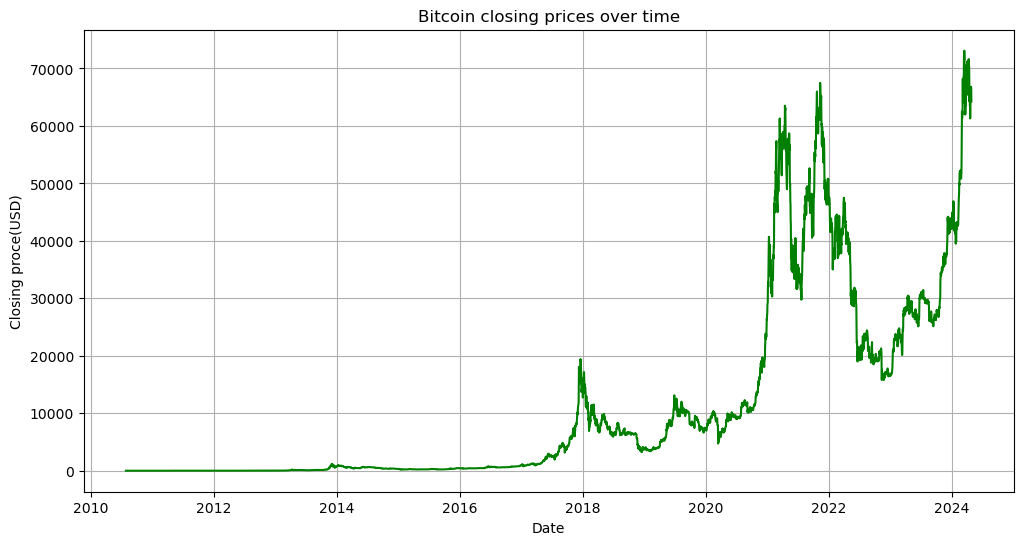

In [14]:
#line plot of bitcoin closing prices over time
plt.figure(figsize=(12,6))
plt.plot(df['Start'],df['Close'], color = 'green')
plt.title('Bitcoin closing prices over time')
plt.xlabel('Date')
plt.ylabel('Closing proce(USD)')
plt.grid(True)
plt.show()

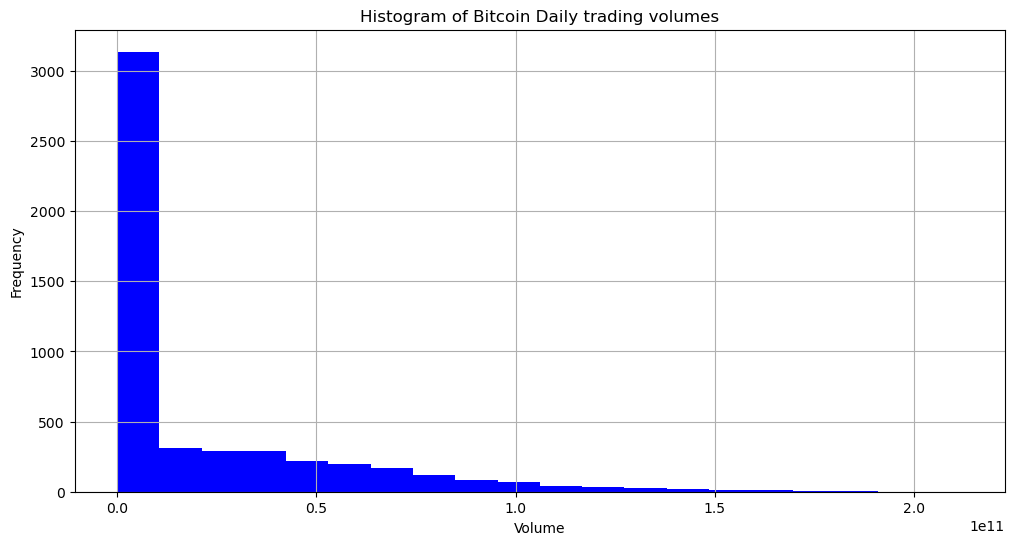

In [24]:
#Histogram of Bitcoin Daily trading volumes
plt.figure(figsize=(12,6))
plt.hist(df['Volume'], bins=20, color='blue')
plt.title('Histogram of Bitcoin Daily trading volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid('True')
plt.show()

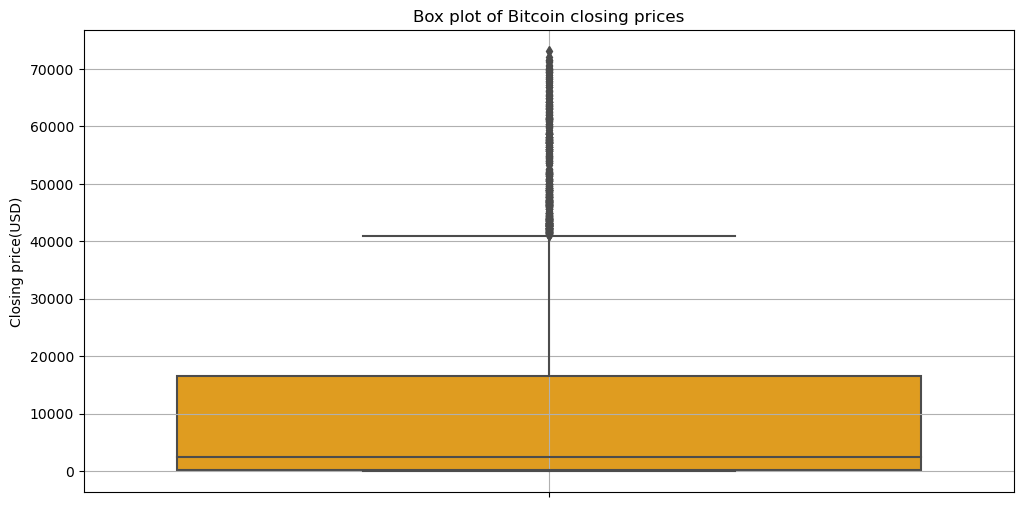

In [30]:
#Box plot of Bitcoin closing prices
plt.figure(figsize=(12,6))
sn.boxplot(y=df['Close'], color='orange')
plt.title('Box plot of Bitcoin closing prices')
plt.ylabel('Closing price(USD)')
plt.grid(True)
plt.show()

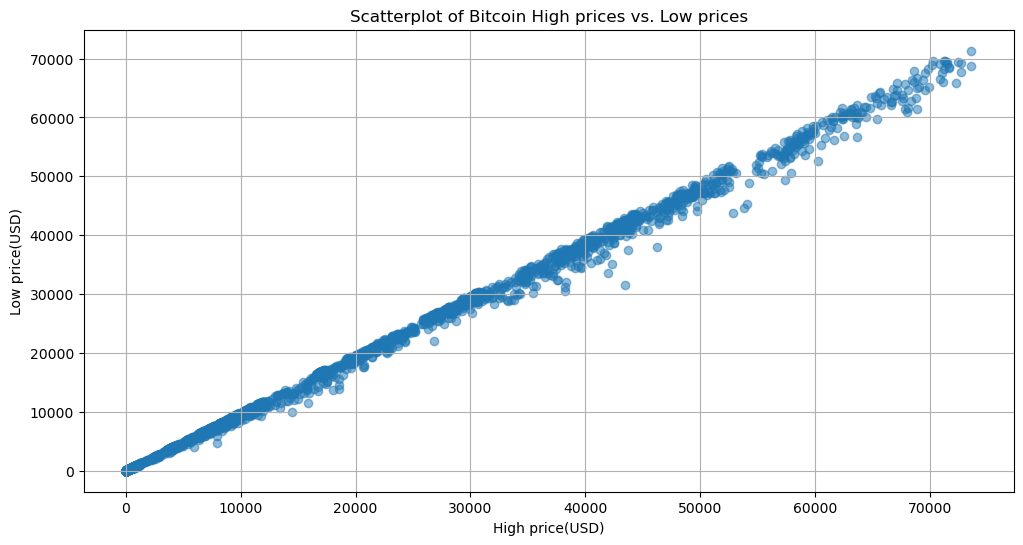

In [41]:
#Scatterplot of Bitcoin High prices vs. Low prices
plt.figure(figsize=(12,6))
plt.scatter(df['High'], df['Low'], alpha=0.5)
plt.grid(True)
plt.title('Scatterplot of Bitcoin High prices vs. Low prices')
plt.xlabel('High price(USD)')
plt.ylabel('Low price(USD)')
plt.show()

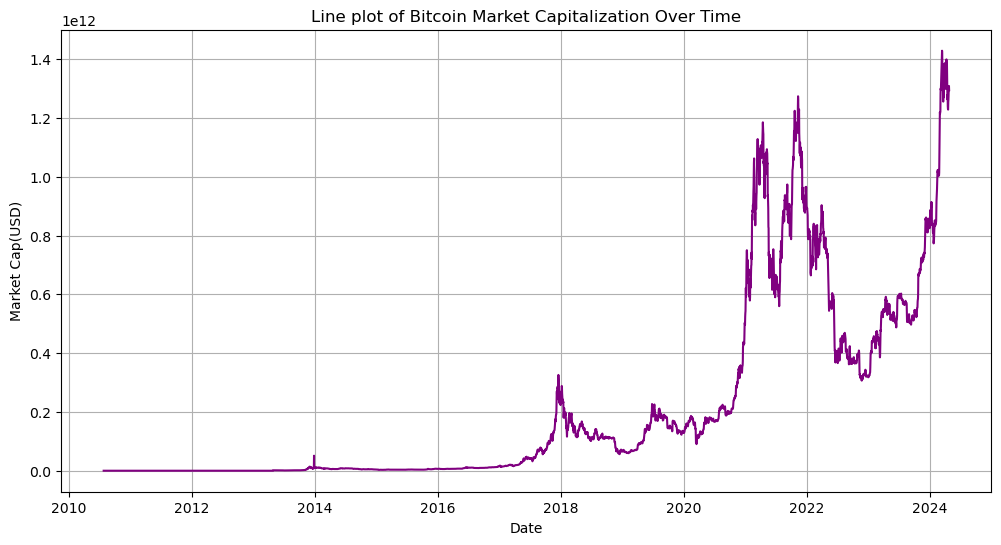

In [44]:
#Line plot of Bitcoin Market Capitalization Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Start'],df['Market Cap'], color='purple')
plt.title('Line plot of Bitcoin Market Capitalization Over Time')
plt.xlabel('Date')
plt.ylabel('Market Cap(USD)')
plt.grid(True)
plt.show()

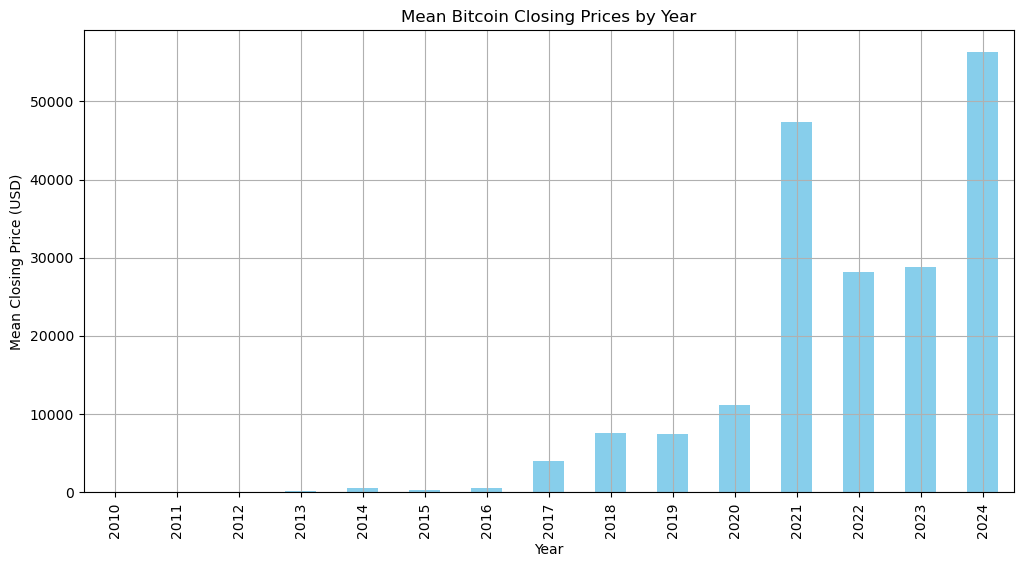

In [56]:
#Bar plot of Bitcoin Closing Price by Year
df['Year'] = df['Start'].dt.year

plt.figure(figsize=(12,6))
# The below plots the max value for the year
# plt.bar(df['Year'],df['Close']) 

#Hence, we calculate mean for accuracy
yearly_mean_close = df.groupby('Year')['Close'].mean()
yearly_mean_close.plot(kind='bar', color='skyblue')
plt.title('Mean Bitcoin Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price (USD)')
plt.grid(True)
plt.show()

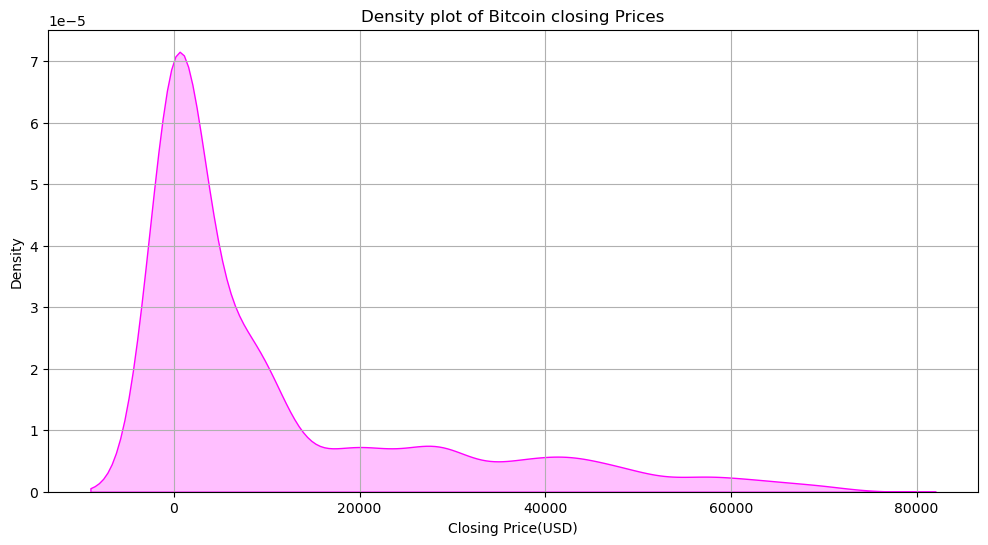

In [60]:
#Density plot of Bitcoin closing prices
plt.figure(figsize=(12,6))
sn.kdeplot(df['Close'], fill=True, color='Magenta')
plt.title('Density plot of Bitcoin closing Prices')
plt.xlabel('Closing Price(USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

           Open      High       Low     Close
Open   1.000000  0.999604  0.999377  0.999102
High   0.999604  1.000000  0.999252  0.999605
Low    0.999377  0.999252  1.000000  0.999543
Close  0.999102  0.999605  0.999543  1.000000


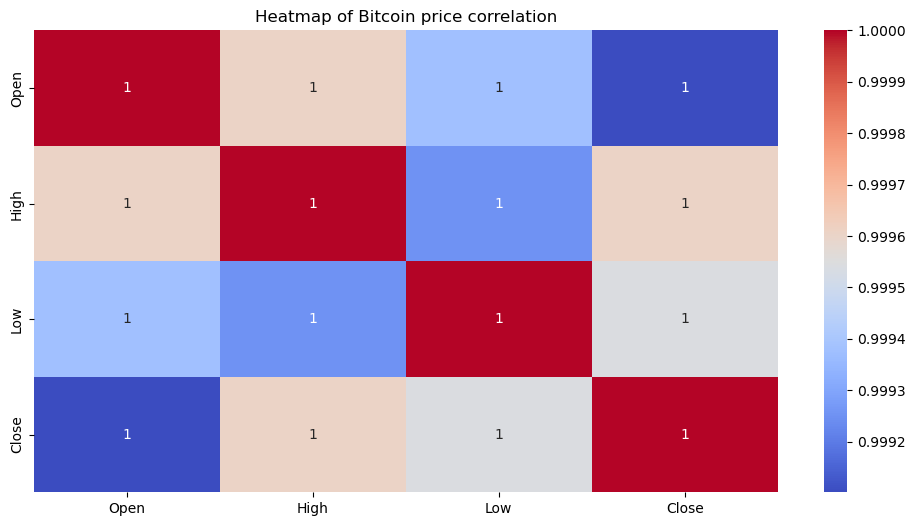

In [65]:
#Heatmap of Bitcoin price correlation
corr= df[['Open','High','Low','Close']].corr()
print(corr)

plt.figure(figsize=(12,6))
sn.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Bitcoin price correlation')
plt.show()

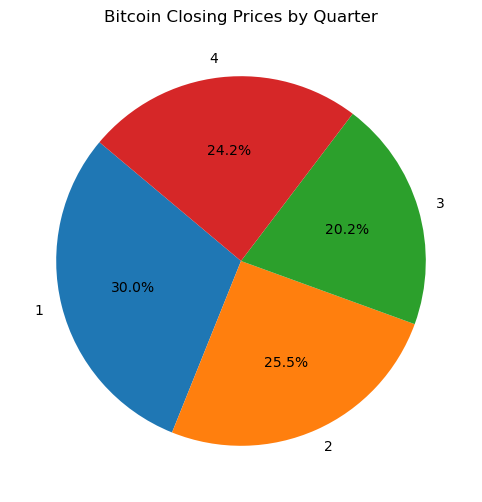

In [70]:
#Pie chart of Bitcoin closing prices by Quarter
df['Quarter'] = df['Start'].dt.quarter
qtrly_mean_close = df.groupby('Quarter')['Close'].mean()

plt.figure(figsize=(12,6))
plt.pie(qtrly_mean_close, labels=qtrly_mean_close.index, autopct='%1.1f%%', startangle=140)
plt.title('Bitcoin Closing Prices by Quarter')
plt.show()